In [62]:
# Import all the tools we need

# Numpy and Pandas are used for data manipulation
import numpy as np
import pandas as pd

# Matplot lib and seaborn are used for plotting graphs
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns; sns.set()
plt.style.use ('seaborn-darkgrid')

# We want our plots to appear inside the notebook
%matplotlib inline

# Models from Scikit-Learn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline

# Model evaluations
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

<ipython-input-62-7c48af124499>:11: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use ('seaborn-darkgrid')


In [63]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing the data and preparing it for modelling

In [64]:
# Load the data into a pandas DataFrame
df = pd.read_csv('/content/drive/MyDrive/Gold/Dataset/XAU_1d_data_2004_to_2024-09-20.csv', low_memory=False,
                parse_dates=['Time'], dayfirst=True)

### Data Exploration (Exploratory data analysis (EDA))

In [65]:
df.head()

,Date,Time,Open,High,Low,Close,Volume
0,2004.06.11,2024-10-21,384.0,384.8,382.8,384.1,272
1,2004.06.14,2024-10-21,384.3,385.8,381.8,382.8,1902
2,2004.06.15,2024-10-21,382.8,388.8,381.1,388.6,1951
3,2004.06.16,2024-10-21,387.1,389.8,382.6,383.8,2014
4,2004.06.17,2024-10-21,383.6,389.3,383.0,387.6,1568


In [66]:
# Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5205 entries, 0 to 5204
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    5205 non-null   object        
 1   Time    5205 non-null   datetime64[ns]
 2   Open    5205 non-null   float64       
 3   High    5205 non-null   float64       
 4   Low     5205 non-null   float64       
 5   Close   5205 non-null   float64       
 6   Volume  5205 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 284.8+ KB


In [67]:
df.shape # (rows, columns)

(5205, 7)

In [68]:
df.describe()

,Time,Open,High,Low,Close,Volume
count,5205,5205.000000,5205.000000,5205.000000,5205.000000,5205.000000
mean,2024-10-20 23:59:59.999999744,1296.651641,1306.106361,1286.952941,1296.810334,75722.276465
min,2024-10-21 00:00:00,382.800000,384.800000,381.100000,382.800000,2.000000
25%,2024-10-21 00:00:00,963.170000,975.800000,953.090000,962.830000,22297.000000
50%,2024-10-21 00:00:00,1284.830000,1291.930000,1277.810000,1284.950000,69922.000000
75%,2024-10-21 00:00:00,1677.930000,1692.780000,1663.220000,1677.610000,110485.000000
max,2024-10-21 00:00:00,2592.200000,2593.390000,2591.510000,2592.290000,679039.000000
std,NaN,472.282414,475.206898,469.352620,472.383844,64797.308192


In [69]:
# To see the first 1000
df[:1000]

,Date,Time,Open,High,Low,Close,Volume
0,2004.06.11,2024-10-21,384.0,384.8,382.8,384.1,272
1,2004.06.14,2024-10-21,384.3,385.8,381.8,382.8,1902
2,2004.06.15,2024-10-21,382.8,388.8,381.1,388.6,1951
3,2004.06.16,2024-10-21,387.1,389.8,382.6,383.8,2014
4,2004.06.17,2024-10-21,383.6,389.3,383.0,387.6,1568
...,...,...,...,...,...,...,...
995,2008.05.14,2024-10-21,865.9,870.6,859.6,864.5,7369
996,2008.05.15,2024-10-21,864.7,887.2,861.9,881.2,6590
997,2008.05.16,2024-10-21,882.5,904.4,879.8,902.1,6640
998,2008.05.19,2024-10-21,905.1,913.5,900.5,904.7,5912


In [70]:
# Check if there is any null values
df.isna().sum()

,0
Date,0
Time,0
Open,0
High,0
Low,0
Close,0
Volume,0


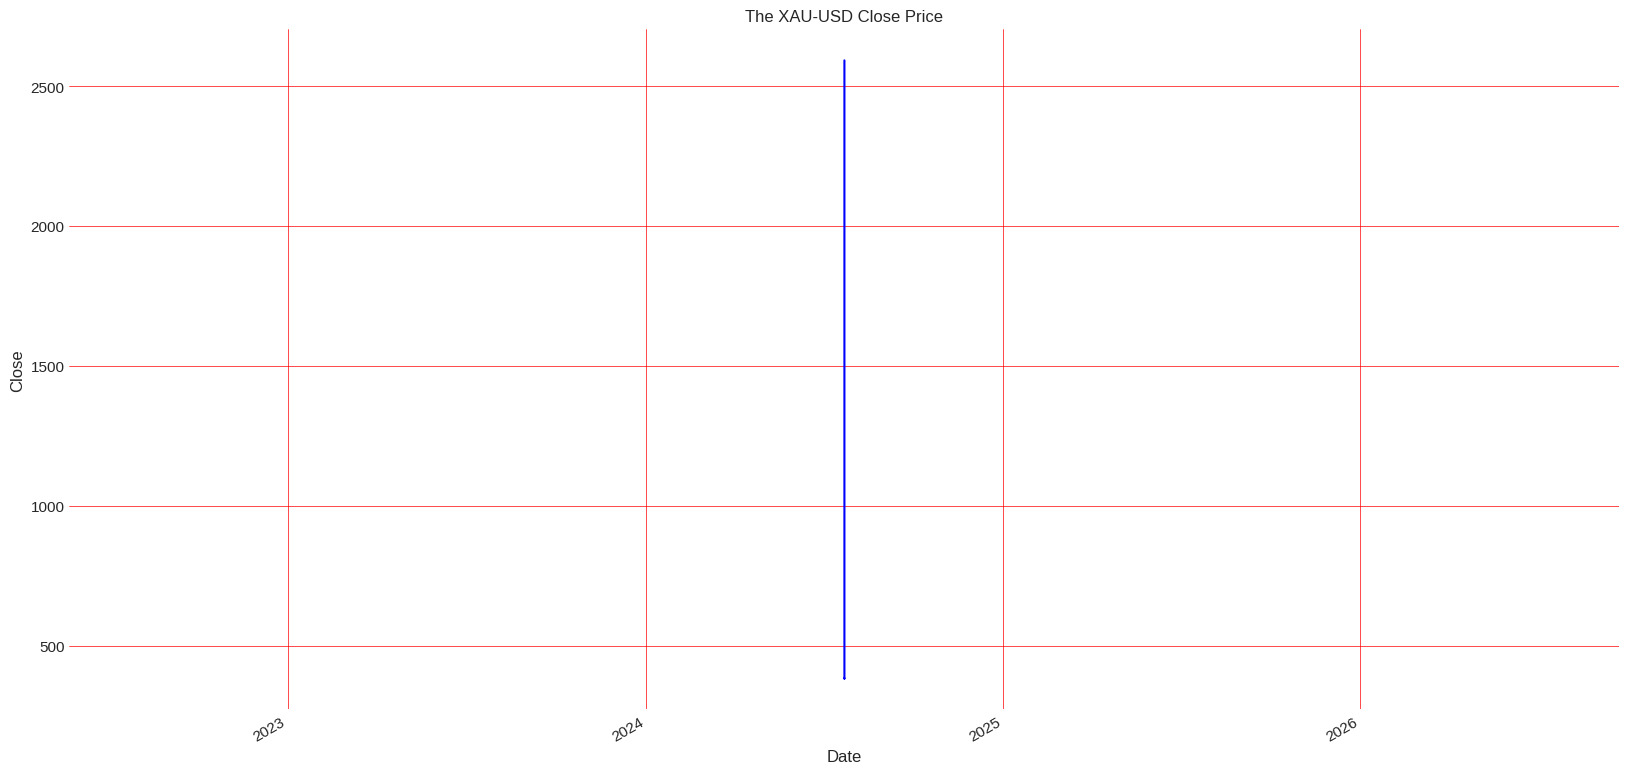

In [71]:
# Plot the dataframe

date = df['Time']
value = df['Close']

# Dealing with dates on the X axis
fig, ax = plt.subplots(figsize=(20,10))
ax.set_facecolor('white')

half_year_locator = mdates.MonthLocator(interval=12)
year_month_formatter = mdates.DateFormatter('%Y')


ax.xaxis.set_major_locator(half_year_locator) # Locator for major axis only
ax.xaxis.set_major_formatter(year_month_formatter) # Formatter for major axis only
ax.plot(date, value, color='blue');

# Add the grid
# Customize the major grid (outer grid)
ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid (inner grid)
ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('The XAU-USD Close Price')
plt.xlabel('Date')
plt.ylabel('Close')

# Rotates and right aligns the x labels
# Also moves the bottom of the axes up to make room for them
fig.autofmt_xdate()

In [72]:
# prompt: create columns in df  and append values
# using create_features

def create_features(data):
    # 1. Lag Features (Close)
    for lag in range(1, 6):
        data[f'Close_lag{lag}'] = data['Close'].shift(lag)

    # 2. 5-Day Moving Average (MA_5)
    data['MA_5'] = data['Close'].rolling(window=5).mean()

    # 3. 5-Day Rate of Change (ROC_5)
    data['ROC_5'] = (data['Close'] - data['Close'].shift(5)) / data['Close'].shift(5) * 100

    # 4. Momentum (Close)
    data['Momentum_5'] = data['Close'] - data['Close'].shift(5)

    # 5. 5-Day Exponential Moving Average (EMA_5)
    data['EMA_5'] = data['Close'].ewm(span=5, adjust=False).mean()

    # 6. Bollinger Bands (Close)
    data['MA_5'] = data['Close'].rolling(window=5).mean()  # Moving Average
    data['std_5'] = data['Close'].rolling(window=5).std()  # Standard Deviation
    data['Upper_Band'] = data['MA_5'] + (2 * data['std_5'])
    data['Lower_Band'] = data['MA_5'] - (2 * data['std_5'])

    # 7. 5-Day Standard Deviation (Volatility)
    data['Volatility_5'] = data['Close'].rolling(window=5).std()

    # 8. Cumulative Returns (Close)
    data['Cumulative_Return_5'] = (data['Close'] / data['Close'].shift(5)) - 1

    # 9. Price Differences (Close)
    data['Close_diff'] = data['Close'].diff(1)
    return data

df = create_features(df)

In [73]:
df.head()

,Date,Time,Open,High,Low,Close,Volume,Close_lag1,Close_lag2,Close_lag3,...,MA_5,ROC_5,Momentum_5,EMA_5,std_5,Upper_Band,Lower_Band,Volatility_5,Cumulative_Return_5,Close_diff
0,2004.06.11,2024-10-21,384.0,384.8,382.8,384.1,272,NaN,NaN,NaN,...,NaN,NaN,NaN,384.100000,NaN,NaN,NaN,NaN,NaN,NaN
1,2004.06.14,2024-10-21,384.3,385.8,381.8,382.8,1902,384.1,NaN,NaN,...,NaN,NaN,NaN,383.666667,NaN,NaN,NaN,NaN,NaN,-1.3
2,2004.06.15,2024-10-21,382.8,388.8,381.1,388.6,1951,382.8,384.1,NaN,...,NaN,NaN,NaN,385.311111,NaN,NaN,NaN,NaN,NaN,5.8
3,2004.06.16,2024-10-21,387.1,389.8,382.6,383.8,2014,388.6,382.8,384.1,...,NaN,NaN,NaN,384.807407,NaN,NaN,NaN,NaN,NaN,-4.8
4,2004.06.17,2024-10-21,383.6,389.3,383.0,387.6,1568,383.8,388.6,382.8,...,385.38,NaN,NaN,385.738272,2.553821,390.487641,380.272359,2.553821,NaN,3.8


In [74]:
# prompt: drop na

df.dropna(inplace=True)

In [75]:
# Separate features and target variable
X = df.drop(['Date','Volume','Close', 'Time'], axis=1)
y = df['Close']

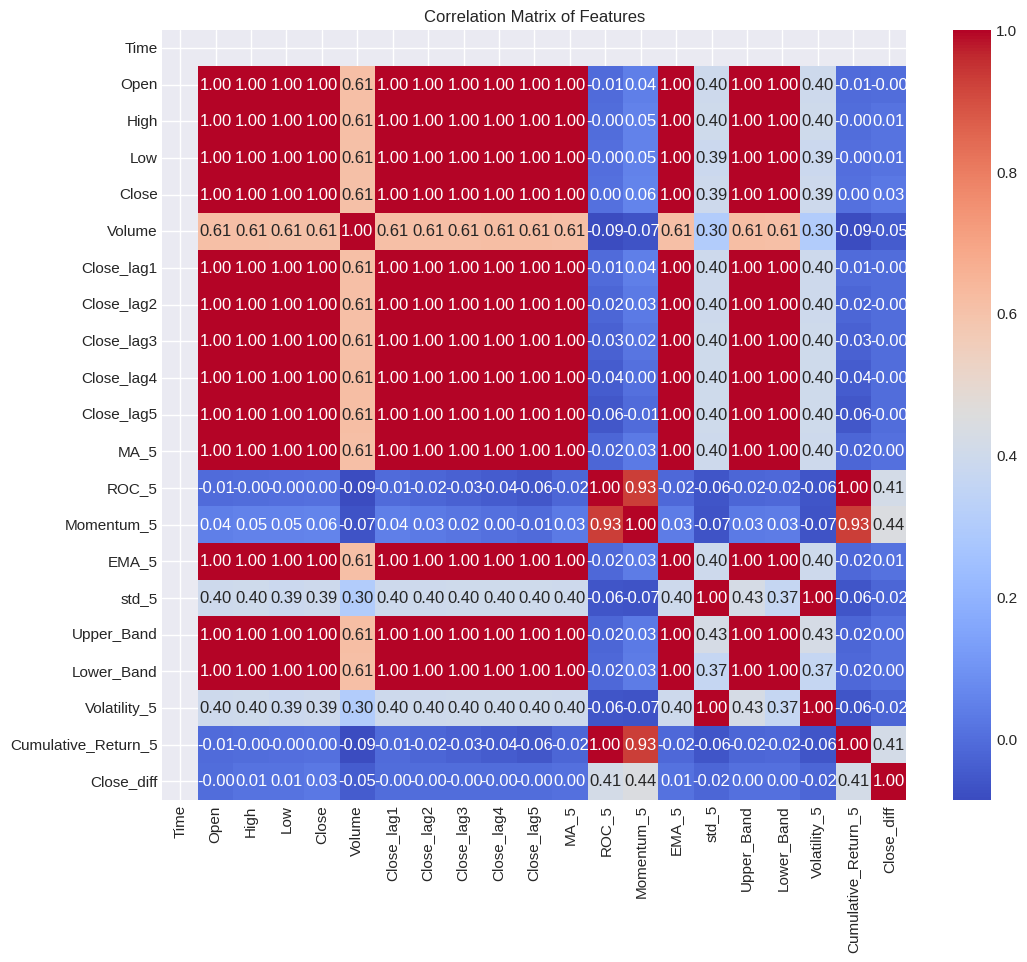

In [76]:
# prompt: correlation matrix

correlation_matrix = df.drop(columns='Date').corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

In [77]:
df = df.drop(columns=['Date','Volume'])

In [78]:
df.head()

,Time,Open,High,Low,Close,Close_lag1,Close_lag2,Close_lag3,Close_lag4,Close_lag5,MA_5,ROC_5,Momentum_5,EMA_5,std_5,Upper_Band,Lower_Band,Volatility_5,Cumulative_Return_5,Close_diff
5,2024-10-21,388.6,395.8,385.8,394.3,387.6,383.8,388.6,382.8,384.1,387.42,2.655558,10.2,388.592181,4.560921,396.541842,378.298158,4.560921,0.026556,6.7
6,2024-10-21,394.3,396.8,392.1,393.1,394.3,387.6,383.8,388.6,382.8,389.48,2.690700,10.3,390.094787,4.269309,398.018618,380.941382,4.269309,0.026907,-1.2
7,2024-10-21,392.8,396.3,392.3,394.1,393.1,394.3,387.6,383.8,388.6,390.58,1.415337,5.5,391.429858,4.675147,399.930294,381.229706,4.675147,0.014153,1.0
8,2024-10-21,394.0,396.6,392.3,395.6,394.1,393.1,394.3,387.6,383.8,392.94,3.074518,11.8,392.819906,3.114964,399.169928,386.710072,3.114964,0.030745,1.5
9,2024-10-21,394.0,402.8,393.1,401.1,395.6,394.1,393.1,394.3,387.6,395.64,3.482972,13.5,395.579937,3.179308,401.998616,389.281384,3.179308,0.034830,5.5


In [79]:
# Normalization
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

In [119]:
import pickle

# Assuming 'scaler' is defined in your previous code (from the provided snippet)
# ... your code ...

# Save the scaler to a .pkl file in your Google Drive
with open('/content/drive/MyDrive/Gold/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [80]:
X

,Open,High,Low,Close_lag1,Close_lag2,Close_lag3,Close_lag4,Close_lag5,MA_5,ROC_5,Momentum_5,EMA_5,std_5,Upper_Band,Lower_Band,Volatility_5,Cumulative_Return_5,Close_diff
5,388.60,395.80,385.80,387.60,383.80,388.60,382.80,384.10,387.420,2.655558,10.20,388.592181,4.560921,396.541842,378.298158,4.560921,0.026556,6.70
6,394.30,396.80,392.10,394.30,387.60,383.80,388.60,382.80,389.480,2.690700,10.30,390.094787,4.269309,398.018618,380.941382,4.269309,0.026907,-1.20
7,392.80,396.30,392.30,393.10,394.30,387.60,383.80,388.60,390.580,1.415337,5.50,391.429858,4.675147,399.930294,381.229706,4.675147,0.014153,1.00
8,394.00,396.60,392.30,394.10,393.10,394.30,387.60,383.80,392.940,3.074518,11.80,392.819906,3.114964,399.169928,386.710072,3.114964,0.030745,1.50
9,394.00,402.80,393.10,395.60,394.10,393.10,394.30,387.60,395.640,3.482972,13.50,395.579937,3.179308,401.998616,389.281384,3.179308,0.034830,5.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5200,2506.13,2518.37,2500.15,2505.67,2496.19,2516.31,2496.50,2492.71,2506.276,0.962808,24.00,2507.865291,10.089776,2526.455552,2486.096448,10.089776,0.009628,11.04
5201,2516.59,2528.88,2501.15,2516.71,2505.67,2496.19,2516.31,2496.50,2509.430,0.631684,15.77,2509.333527,8.628928,2526.687856,2492.172144,8.628928,0.006317,-4.44
5202,2512.06,2560.12,2511.01,2512.27,2516.71,2505.67,2496.19,2516.31,2517.974,1.697724,42.72,2525.899018,24.216005,2566.406009,2469.541991,24.216005,0.016977,46.76
5203,2558.19,2586.09,2556.74,2559.03,2512.27,2516.71,2505.67,2496.19,2534.796,3.369535,84.11,2544.032679,32.942179,2600.680359,2468.911641,32.942179,0.033695,21.27


In [81]:
X_normalized

array([[1.13322152e-03, 2.81333521e-03, 5.89032220e-04, ...,
        3.87298190e-02, 5.82896980e-01, 6.41541191e-01],
       [3.71696659e-03, 3.26709895e-03, 3.44357298e-03, ...,
        3.58508479e-02, 5.84102749e-01, 6.05604331e-01],
       [3.03703368e-03, 3.04021708e-03, 3.53419332e-03, ...,
        3.98575290e-02, 5.40342914e-01, 6.15612064e-01],
       ...,
       [9.63673451e-01, 9.84903280e-01, 9.63525313e-01, ...,
        2.32776844e-01, 5.50032082e-01, 8.23772915e-01],
       [9.84583654e-01, 9.96687525e-01, 9.84245654e-01, ...,
        3.18926986e-01, 6.07394715e-01, 7.07819679e-01],
       [1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        3.52981298e-01, 6.10394393e-01, 6.65605240e-01]])

### Splitting data into train/validation sets

In [82]:
# Splitting the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2,
                                                  random_state=42)

## 5. Modelling

In [83]:
# Instantiate the Linear Regression model
modellr = LinearRegression()

In [84]:
# Fit the model on the training data
modellr.fit(X_train, y_train)

LinearRegression()

In [85]:
# Make predictions on the test data
y_pred = modellr.predict(X_test)

### Evaluation Metrics

In [86]:
# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print ('Mean Absolute Error (MAE):', mae)
print ('Mean Squared Error (MSE):', mse)
print ('R-squared (R2) Score:', r2)

Mean Absolute Error (MAE): 1.0033956571603014e-12
Mean Squared Error (MSE): 1.6265606988097644e-24
R-squared (R2) Score: 1.0


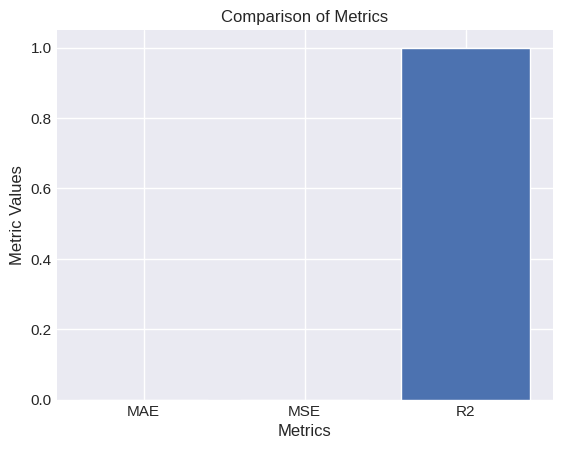

In [87]:
metrics = ['MAE', 'MSE', 'R2']
values = [mae, mse, r2]

fig, ax = plt.subplots()

ax.bar(metrics, values)
ax.set_xlabel('Metrics')
ax.set_ylabel('Metric Values')
ax.set_title('Comparison of Metrics')

plt.show()

### Hyperparameter tuning

We can use techniques like cross-validation and hyperparameter tuning to train the Linear Regression model and select the best model. See below how to perform these steps:

In [88]:
# Create a pipeline with StandardScaler and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('regressor', LinearRegression())
])

In [89]:
# Define the hyperparameters and their possible values for tuning
hyperparameters = {
    'regressor__fit_intercept': [True, False],
}

In [90]:
# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, hyperparameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler',
                                        StandardScaler(with_mean=False)),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__fit_intercept': [True, False]},
             scoring='neg_mean_squared_error')

In [91]:
# Get the best hyperparametrs and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

In [92]:
# Fit the best model to the training data
best_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler(with_mean=False)),
                ('regressor', LinearRegression())])

In [93]:
# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

In [94]:
# Evaluate the model's performance

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Squared Error:', mse)
print('Mean Absolute Error', mae)
print('R-squared (R^2):', r2)

Mean Squared Error: 1.3279504860930555e-25
Mean Absolute Error 2.835612087018e-13
R-squared (R^2): 1.0


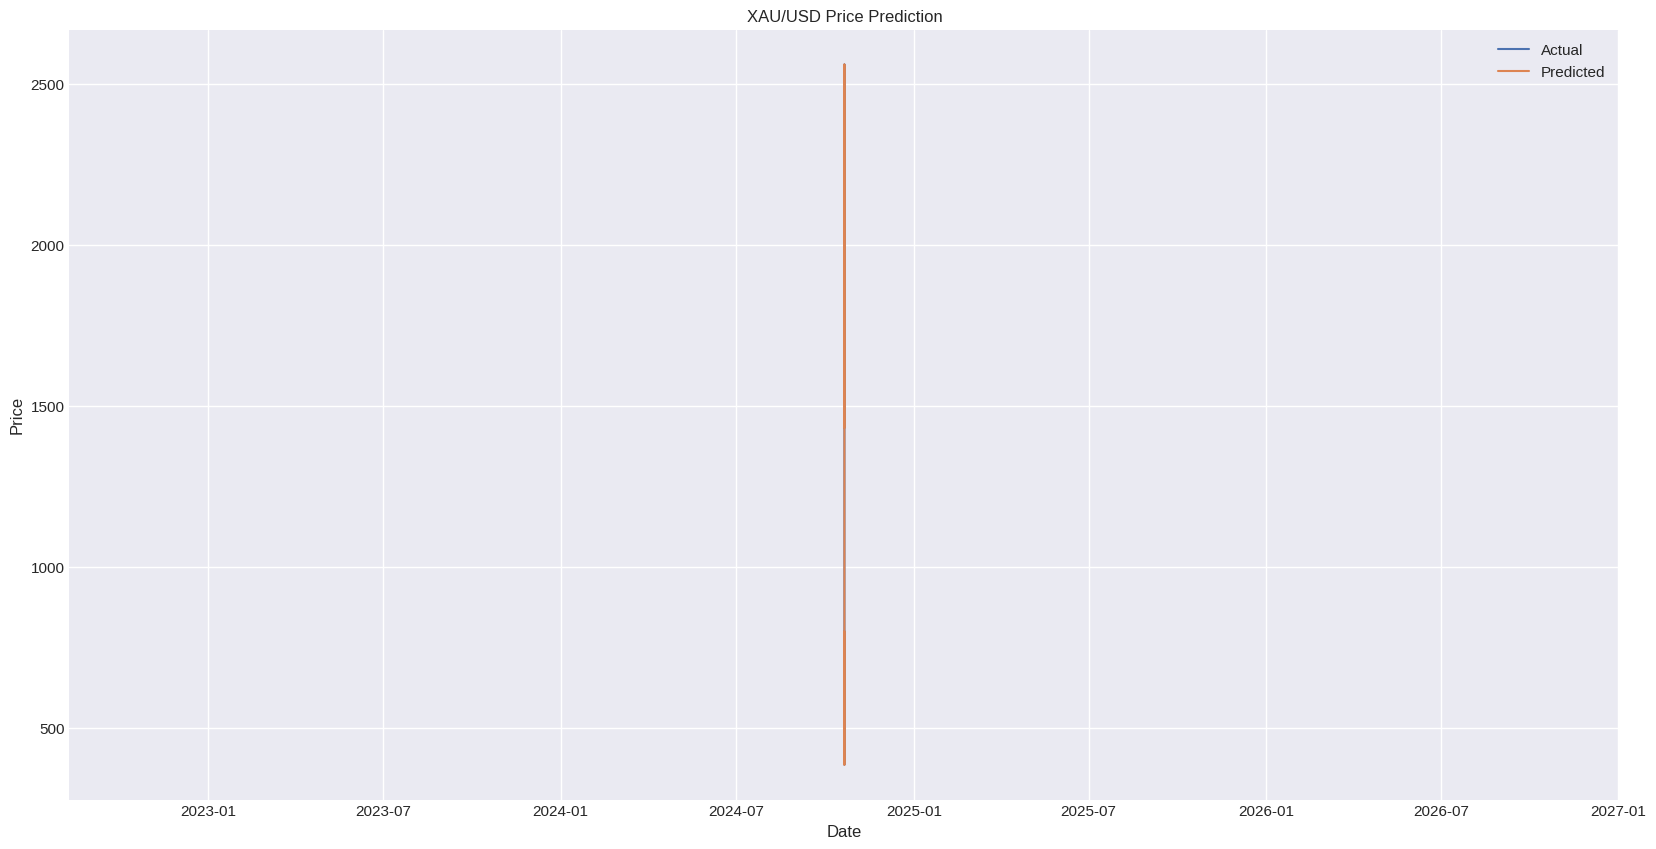

In [95]:
# Plot the actual prices and predicted prices
plt.figure(figsize=(20,10))
plt.plot(df['Time'].iloc[-len(y_test):], y_test.values, label='Actual')
plt.plot(df['Time'].iloc[-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('XAU/USD Price Prediction')
plt.legend()
plt.show()

In [96]:
# prompt: save the model to drive

import pickle

# Assuming 'best_model' is your trained model
filename = '/content/drive/MyDrive/Gold/Gold_trained_model.sav'
pickle.dump(best_model, open(filename, 'wb'))

Mean Absolute Error (MAE): 4.955769230769227
Mean Squared Error (MSE): 56.837744230769225
R-squared (R2) Score: 0.9997559057760453


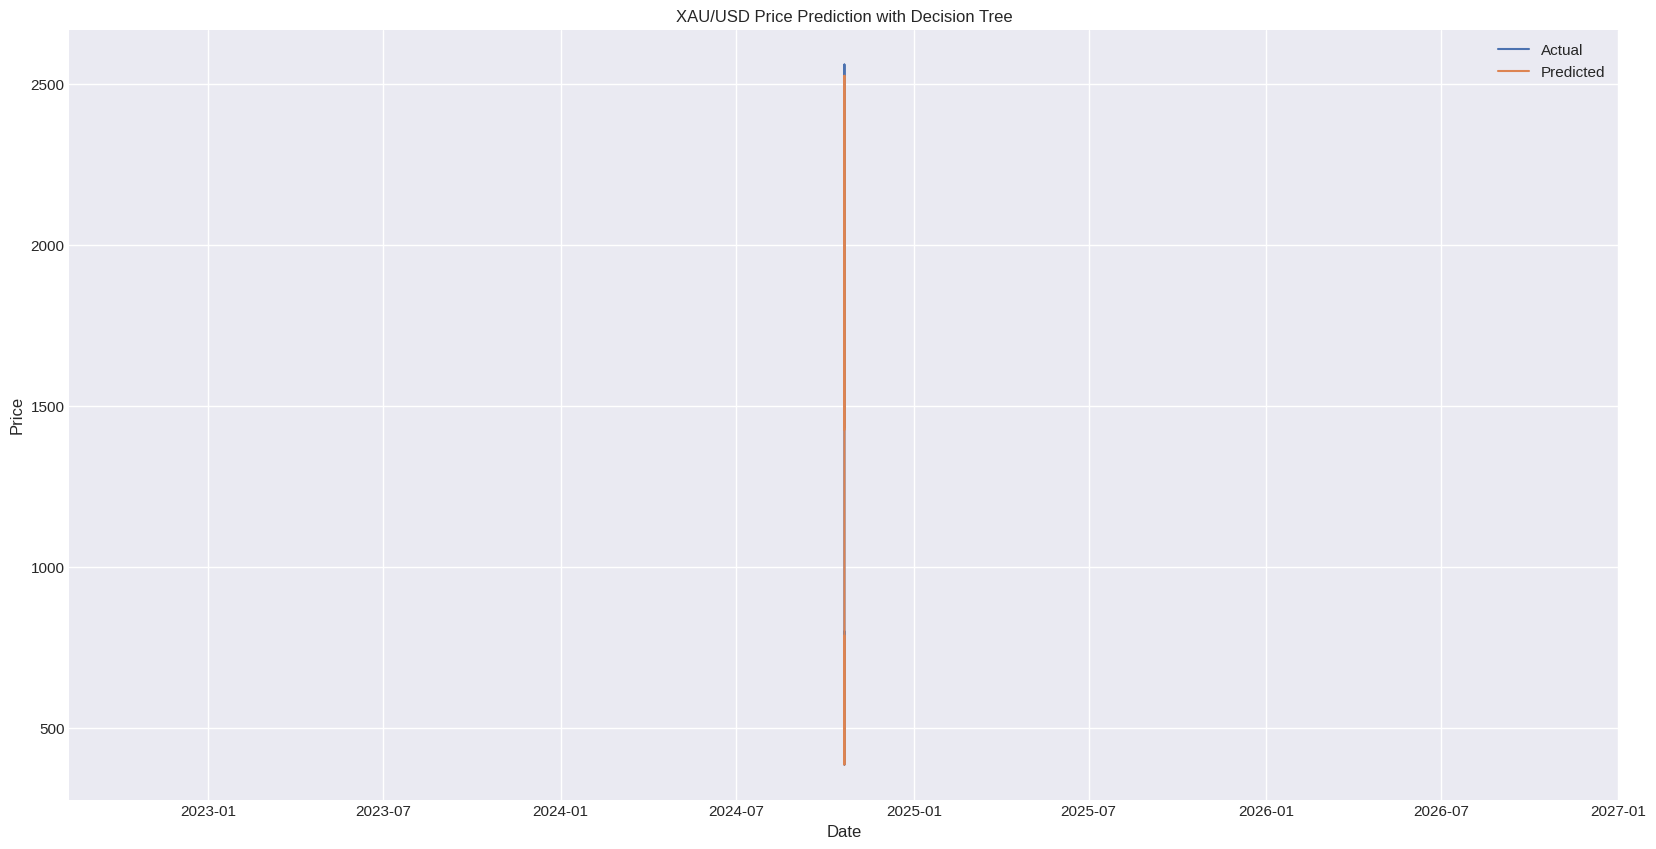

In [97]:
# prompt: try decision tree

from sklearn.tree import DecisionTreeRegressor

# Instantiate the Decision Tree model
modeldt = DecisionTreeRegressor(random_state=42)

# Fit the model on the training data
modeldt.fit(X_train, y_train)

# Make predictions on the test data
y_pred = modeldt.predict(X_test)

# ### Evaluation Metrics
# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print ('Mean Absolute Error (MAE):', mae)
print ('Mean Squared Error (MSE):', mse)
print ('R-squared (R2) Score:', r2)

# Plot the actual prices and predicted prices
plt.figure(figsize=(20,10))
plt.plot(df['Time'].iloc[-len(y_test):], y_test.values, label='Actual')
plt.plot(df['Time'].iloc[-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('XAU/USD Price Prediction with Decision Tree')
plt.legend()
plt.show()

# You can also perform hyperparameter tuning for Decision Tree using GridSearchCV similar to Linear Regression
# Example:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'max_depth': [None, 10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }
# grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)
# best_dt_model = grid_search.best_estimator_

Best Decision Tree Model - Mean Absolute Error: 4.842407852564104
Best Decision Tree Model - Mean Squared Error: 52.17041759949258
Best Decision Tree Model - R-squared: 0.9997759499823632


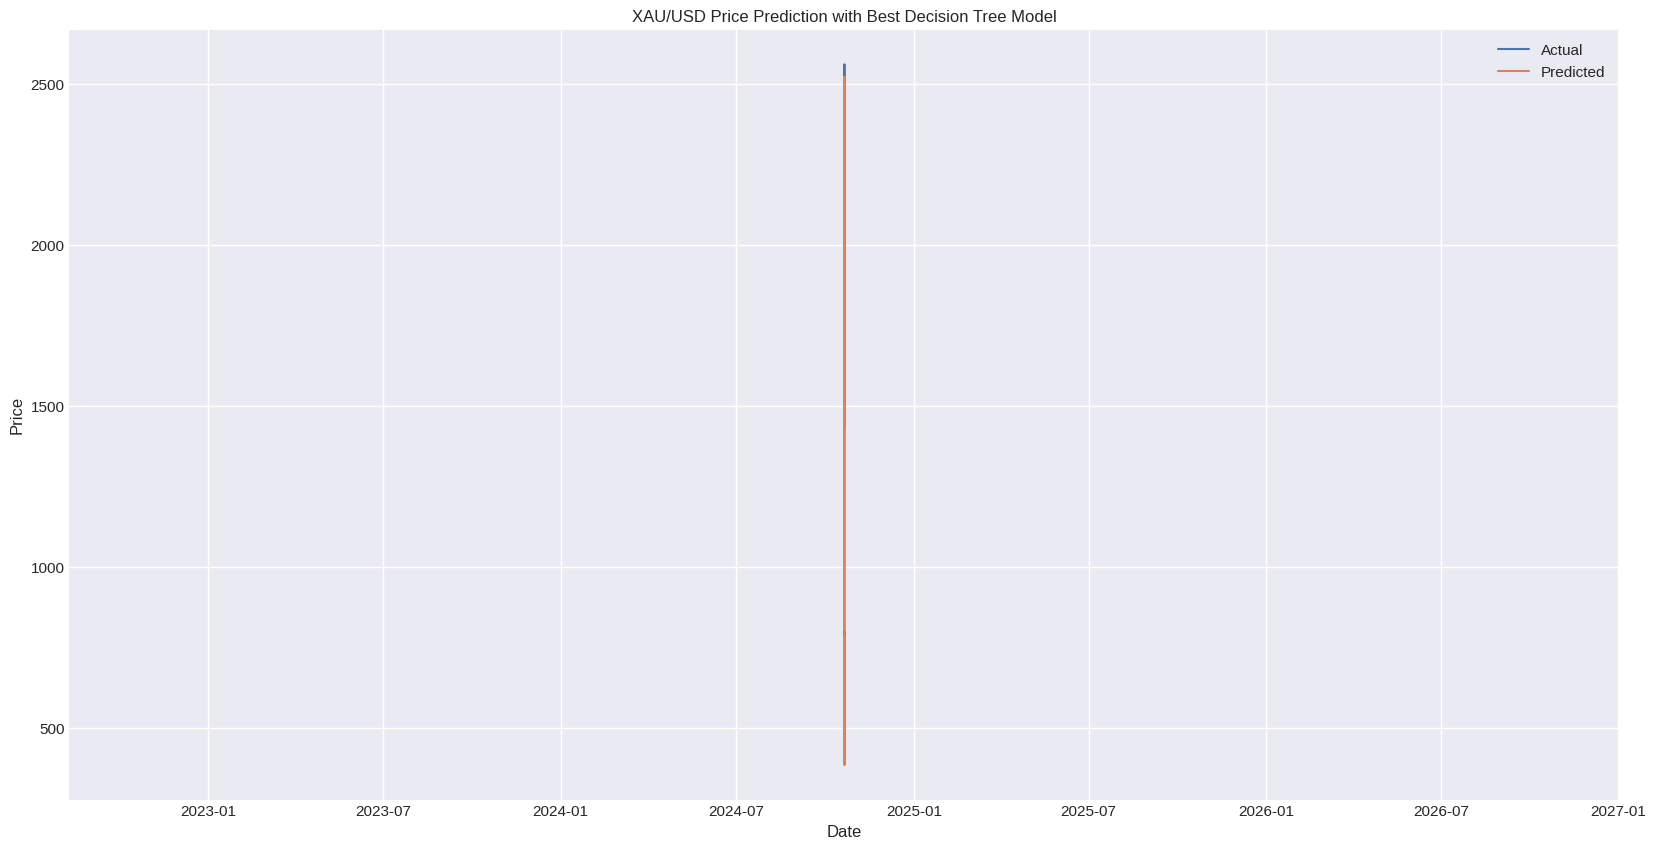

In [98]:
# prompt: hyperparametertune dt using gridsearchcv

from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)
best_dt_model = grid_search.best_estimator_

# Make predictions using the best model
y_pred = best_dt_model.predict(X_test)

# Evaluate the best model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Best Decision Tree Model - Mean Absolute Error:', mae)
print('Best Decision Tree Model - Mean Squared Error:', mse)
print('Best Decision Tree Model - R-squared:', r2)

# Plot the actual and predicted prices using the best model
plt.figure(figsize=(20,10))
plt.plot(df['Time'].iloc[-len(y_test):], y_test.values, label='Actual')
plt.plot(df['Time'].iloc[-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('XAU/USD Price Prediction with Best Decision Tree Model')
plt.legend()
plt.show()

Mean Absolute Error (MAE): 3.4021442307692817
Mean Squared Error (MSE): 26.723532880788927
R-squared (R2) Score: 0.9998852336575256


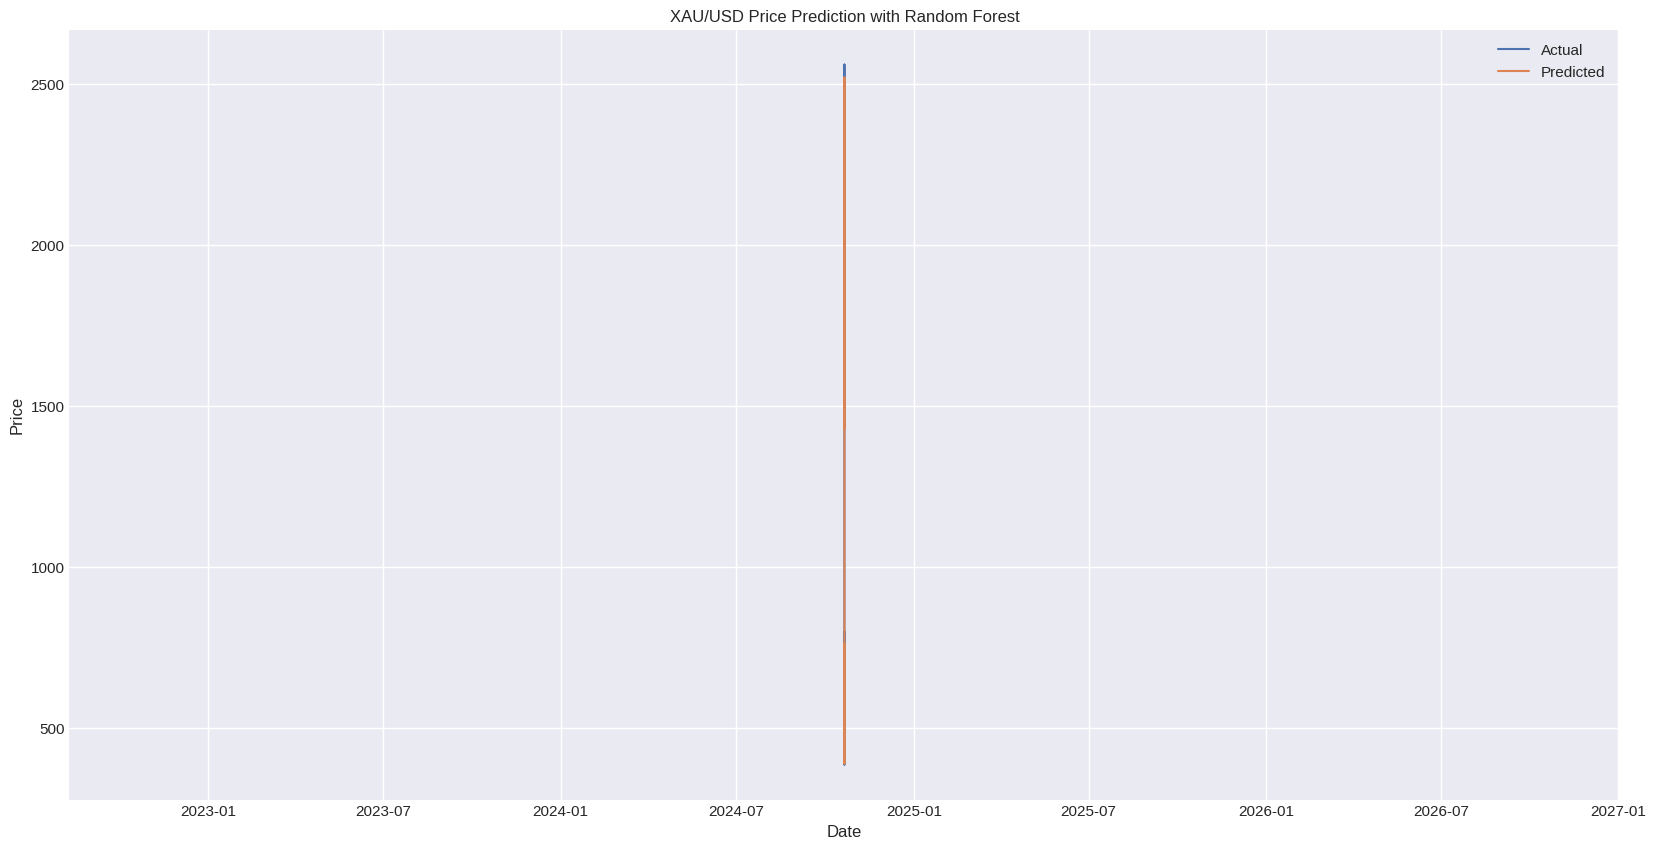

In [99]:
# prompt: try random forest

from sklearn.ensemble import RandomForestRegressor

# Instantiate the Random Forest model
modelrf = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model on the training data
modelrf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = modelrf.predict(X_test)

# ### Evaluation Metrics
# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print ('Mean Absolute Error (MAE):', mae)
print ('Mean Squared Error (MSE):', mse)
print ('R-squared (R2) Score:', r2)

# Plot the actual prices and predicted prices
plt.figure(figsize=(20,10))
plt.plot(df['Time'].iloc[-len(y_test):], y_test.values, label='Actual')
plt.plot(df['Time'].iloc[-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('XAU/USD Price Prediction with Random Forest')
plt.legend()
plt.show()

# You can also perform hyperparameter tuning for Random Forest using GridSearchCV similar to Linear Regression and Decision Tree
# Example:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }
# grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)
# best_rf_model = grid_search.best_estimator_

Best Hyperparameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Random Forest Model - Mean Absolute Error: 3.3929926970810858
Best Random Forest Model - Mean Squared Error: 26.605200574006794
Best Random Forest Model - R-squared: 0.999885741845051


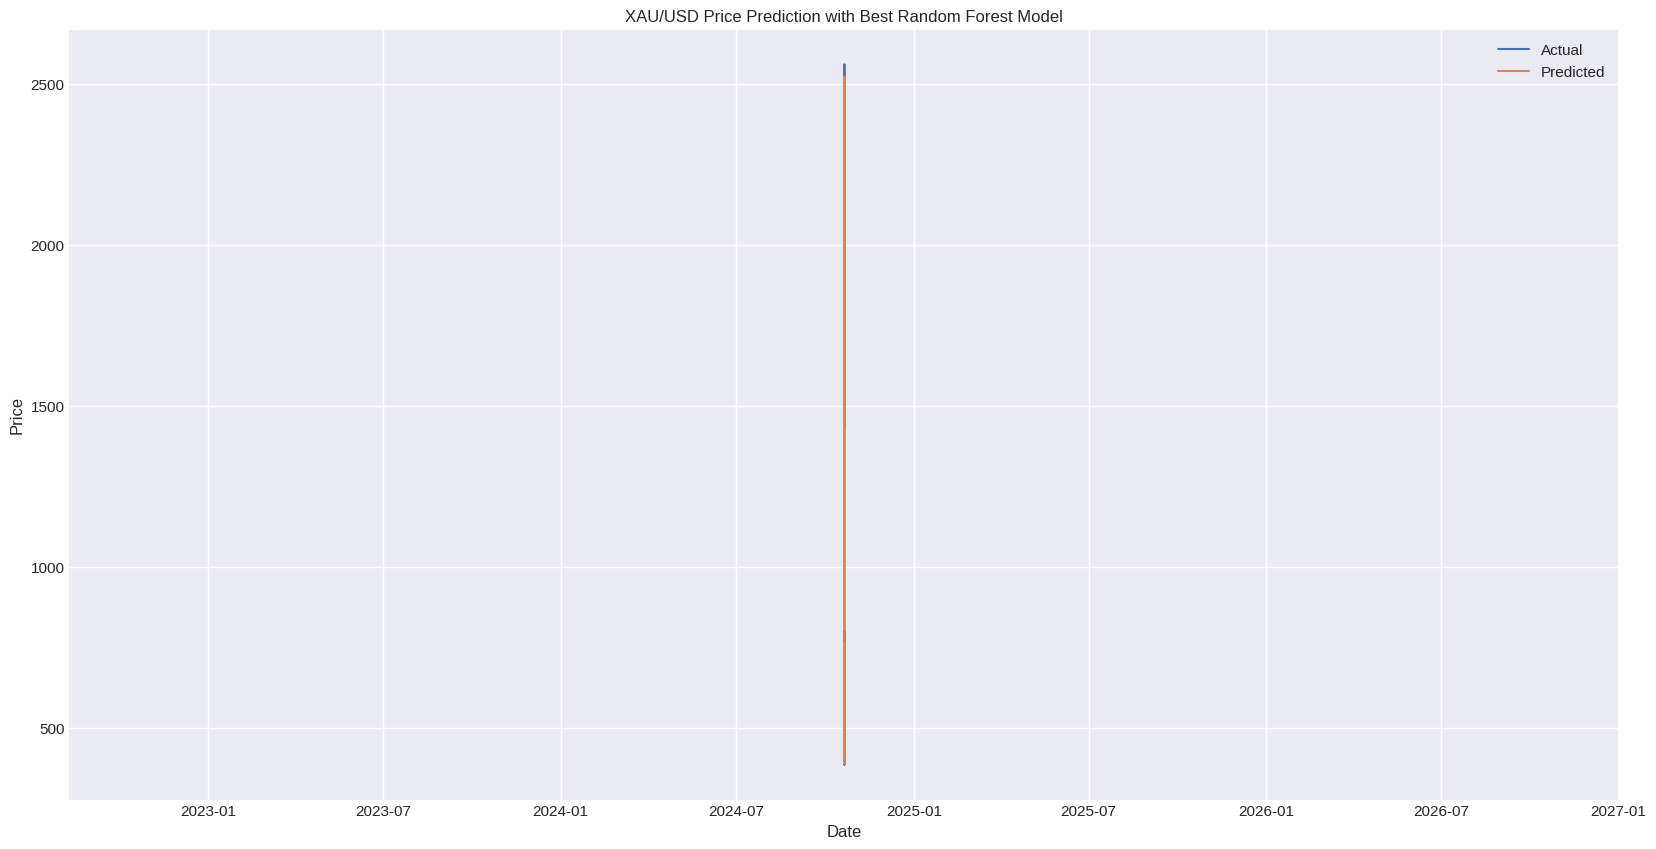

In [100]:
# prompt: tune rf using gridsearchcv

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='neg_mean_squared_error',
                           n_jobs=-1)  # Use all available cores for faster computation

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Get the best model and its hyperparameters
best_rf_model = grid_search.best_estimator_
best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

# Make predictions using the best model
y_pred = best_rf_model.predict(X_test)

# Evaluate the best model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Best Random Forest Model - Mean Absolute Error:', mae)
print('Best Random Forest Model - Mean Squared Error:', mse)
print('Best Random Forest Model - R-squared:', r2)

# Plot the actual and predicted prices using the best model
plt.figure(figsize=(20,10))
plt.plot(df['Time'].iloc[-len(y_test):], y_test.values, label='Actual')
plt.plot(df['Time'].iloc[-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('XAU/USD Price Prediction with Best Random Forest Model')
plt.legend()
plt.show()

Mean Absolute Error (MAE): 135.30337962693437
Mean Squared Error (MSE): 29430.029533508026
R-squared (R2) Score: 0.873610391876587


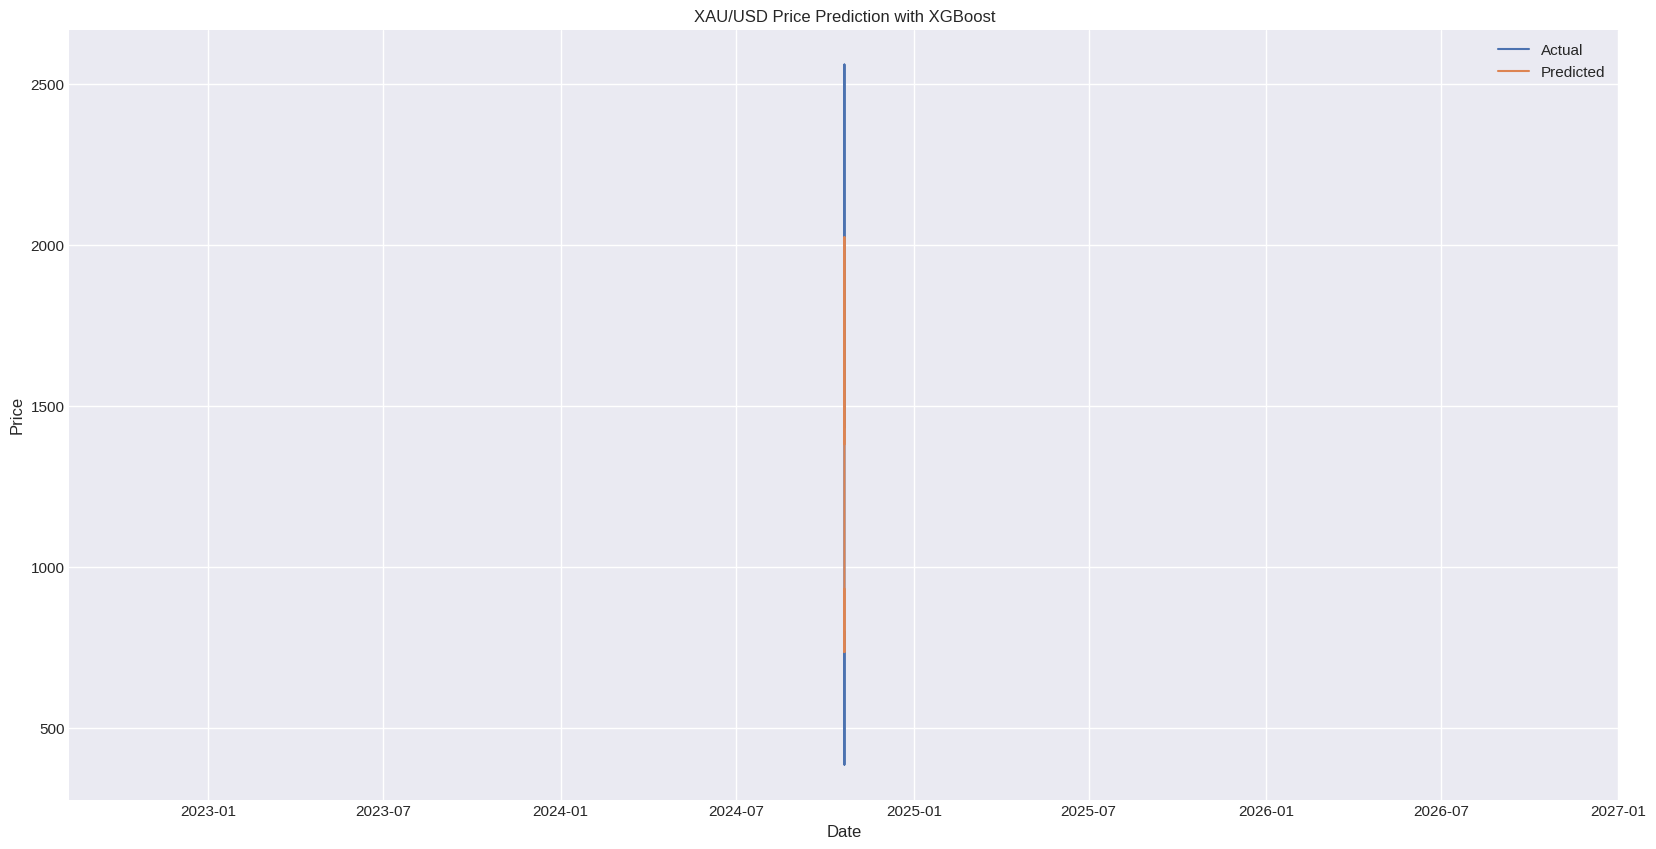

In [101]:
# prompt: use xgboost

!pip install xgboost

import xgboost as xgb

# Create an XGBoost regressor
modelxgb = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

# Fit the model on the training data
modelxgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = modelxgb.predict(X_test)

# ### Evaluation Metrics
# Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print ('Mean Absolute Error (MAE):', mae)
print ('Mean Squared Error (MSE):', mse)
print ('R-squared (R2) Score:', r2)

# Plot the actual prices and predicted prices
plt.figure(figsize=(20,10))
plt.plot(df['Time'].iloc[-len(y_test):], y_test.values, label='Actual')
plt.plot(df['Time'].iloc[-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('XAU/USD Price Prediction with XGBoost')
plt.legend()
plt.show()

# You can also perform hyperparameter tuning for XGBoost using GridSearchCV similar to other models.
# Example:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.1, 0.01, 0.001]
# }
# grid_search = GridSearchCV(xgb.XGBRegressor(objective ='reg:squarederror'), param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)
# best_xgb_model = grid_search.best_estimator_

Mean Absolute Error (MAE): 4.817622000355382
Mean Squared Error (MSE): 47.928909160373166
R-squared (R2) Score: 0.9997941654785067


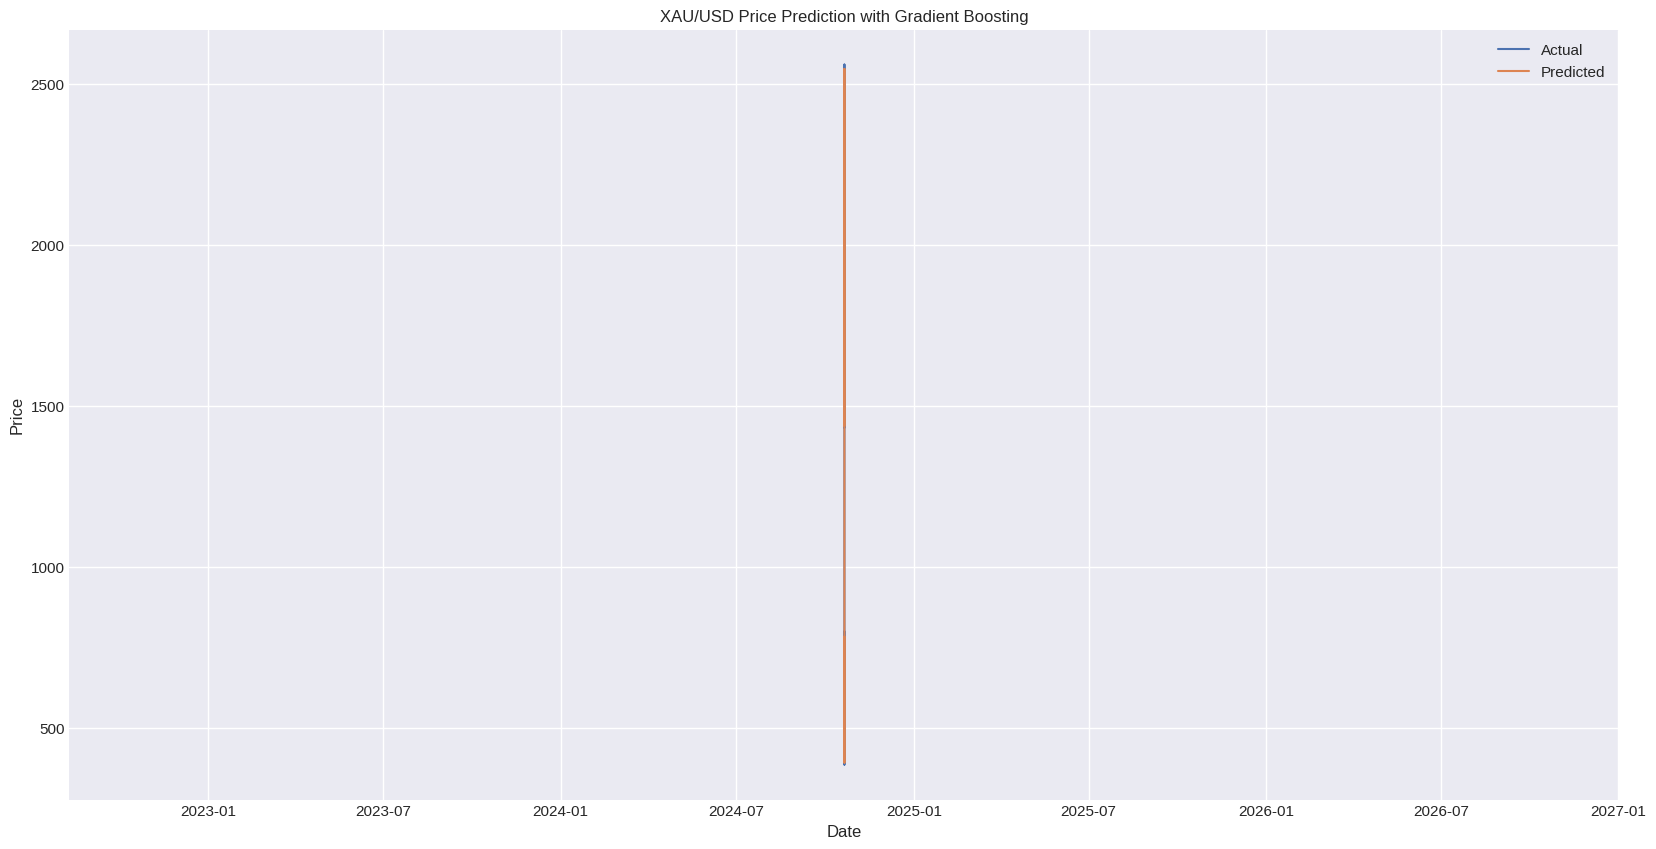

In [102]:
# prompt: use gradientboost

from sklearn.ensemble import GradientBoostingRegressor

# Create a Gradient Boosting Regressor
modelGb = GradientBoostingRegressor(random_state=42)

# Fit the model on the training data
modelGb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = modelGb.predict(X_test)

# ### Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)

# Plot the actual prices and predicted prices
plt.figure(figsize=(20, 10))
plt.plot(df['Time'].iloc[-len(y_test):], y_test.values, label='Actual')
plt.plot(df['Time'].iloc[-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('XAU/USD Price Prediction with Gradient Boosting')
plt.legend()
plt.show()

# You can also perform hyperparameter tuning for Gradient Boosting using GridSearchCV similar to other models.
# Example:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.1, 0.01, 0.001]
# }
# grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)
# best_gb_model = grid_search.best_estimator_

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 6.2 MB/s eta 0:00:00
0:	learn: 424.2076566	total: 71.5ms	remaining: 7.08s
10:	learn: 160.4515000	total: 148ms	remaining: 1.2s
20:	learn: 63.3298191	total: 216ms	remaining: 814ms
30:	learn: 29.5303249	total: 286ms	remaining: 635ms
40:	learn: 19.0240199	total: 349ms	remaining: 503ms
50:	learn: 15.7071254	total: 412ms	remaining: 396ms
60:	learn: 14.2274030	total: 475ms	remaining: 304ms
70:	learn: 13.1958809	total: 548ms	remaining: 224ms
80:	learn: 12.4632792	total: 614ms	remaining: 144ms
90:	learn: 11.9124477	total: 692ms	remaining: 68.5ms
99:	learn: 11.4227194	total: 781ms	remaining: 0us
Mean Absolute Error (MAE): 9.509450154781621
Mean Squared Error (MSE): 152.1625342417856
R-squared (R2) Score: 0.9993465258656302


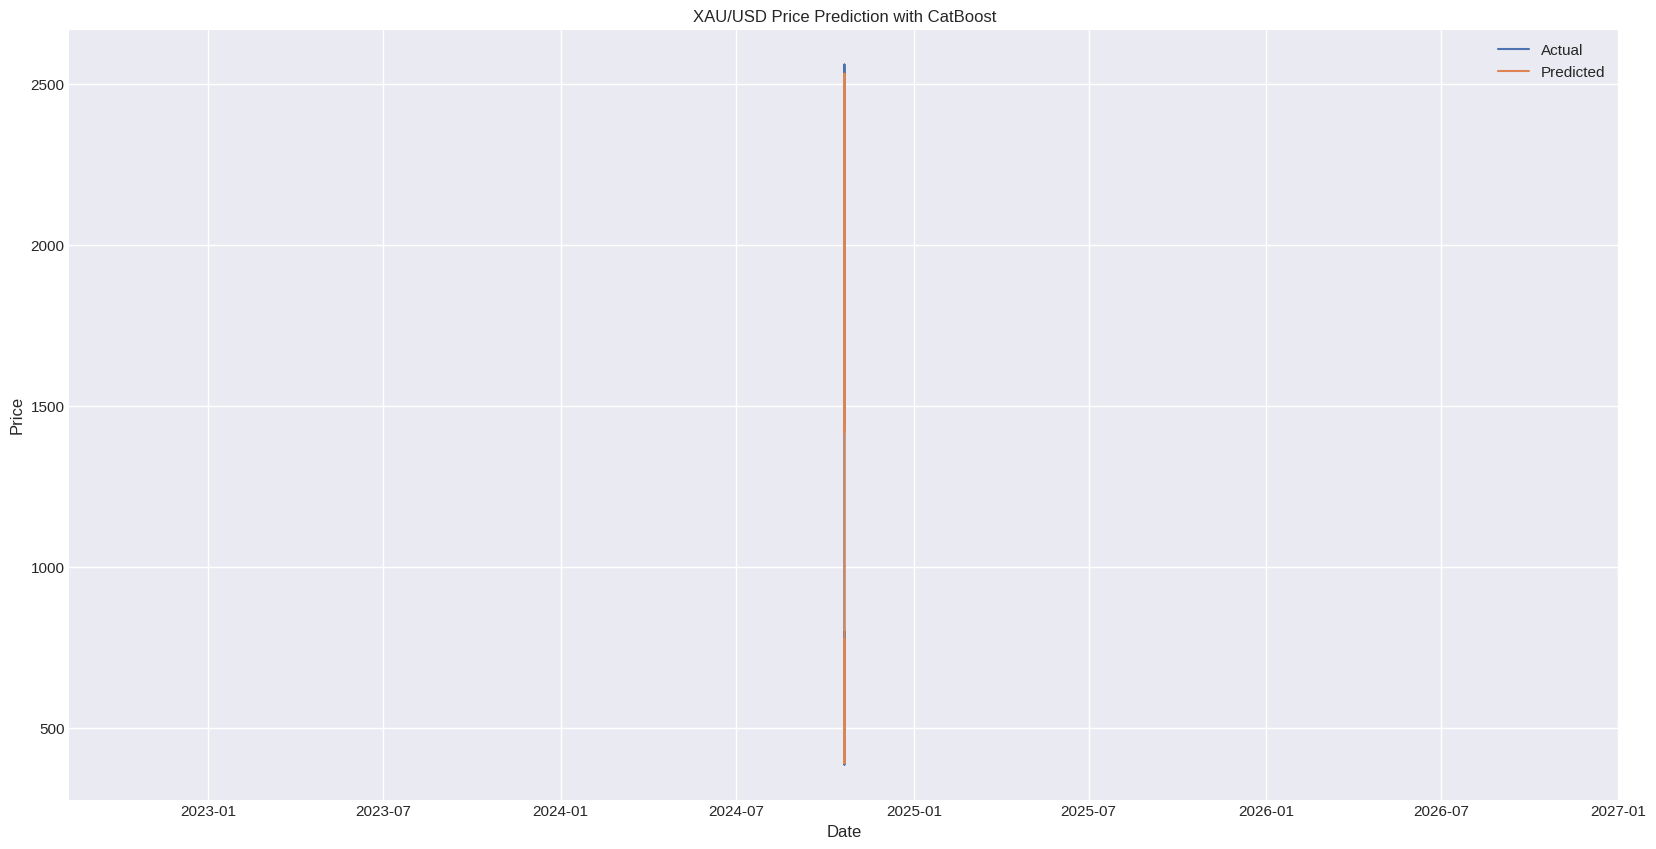

In [103]:
# prompt: use catboost

!pip install catboost

from catboost import CatBoostRegressor

# Create a CatBoost regressor
modelcat = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, loss_function='RMSE')

# Fit the model on the training data
modelcat.fit(X_train, y_train, verbose=10)  # Set verbose to control the output during training

# Make predictions on the test data
y_pred = modelcat.predict(X_test)

# ### Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)

# Plot the actual prices and predicted prices
plt.figure(figsize=(20, 10))
plt.plot(df['Time'].iloc[-len(y_test):], y_test.values, label='Actual')
plt.plot(df['Time'].iloc[-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('XAU/USD Price Prediction with CatBoost')
plt.legend()
plt.show()

# You can also perform hyperparameter tuning for CatBoost using GridSearchCV or other methods.
# Example:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'iterations': [100, 200, 300],
#     'learning_rate': [0.1, 0.05, 0.01],
#     'depth': [6, 8, 10]
# }
# grid_search = GridSearchCV(CatBoostRegressor(loss_function='RMSE'), param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train, verbose=10)
# best_catboost_model = grid_search.best_estimator_

Mean Absolute Error (MAE): 7.972015384615382
Mean Squared Error (MSE): 156.87286240769228
R-squared (R2) Score: 0.9993262969857937


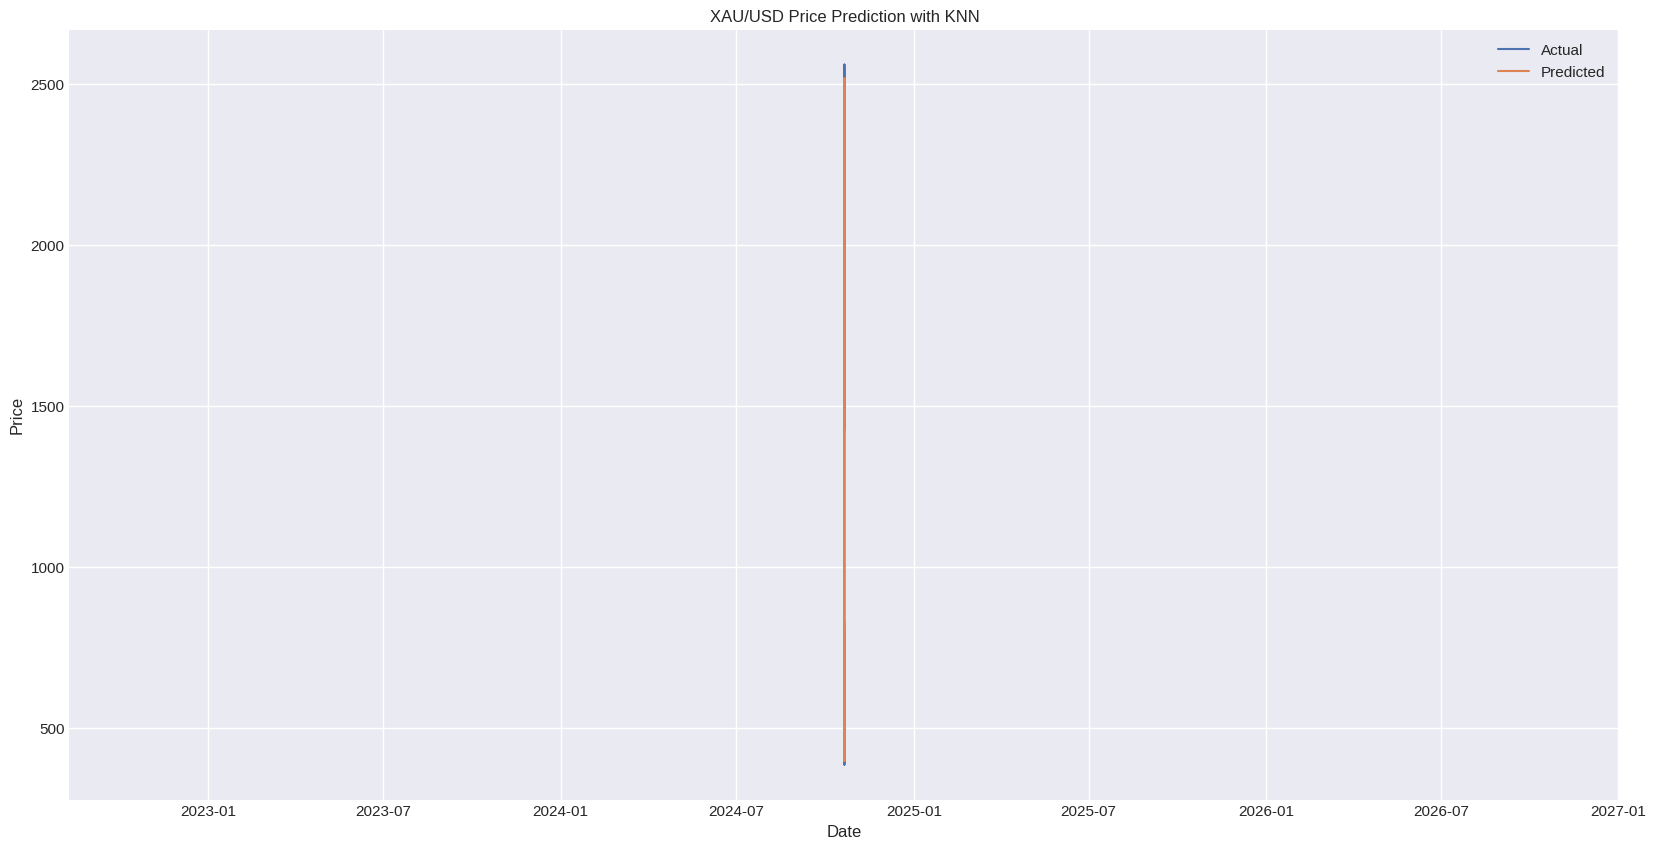

In [104]:
# prompt: use knn

from sklearn.neighbors import KNeighborsRegressor

# Instantiate the KNN model
modelKNN = KNeighborsRegressor(n_neighbors=5)  # You can adjust the number of neighbors

# Fit the model on the training data
modelKNN.fit(X_train, y_train)

# Make predictions on the test data
y_pred = modelKNN.predict(X_test)

# ### Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)

# Plot the actual prices and predicted prices
plt.figure(figsize=(20, 10))
plt.plot(df['Time'].iloc[-len(y_test):], y_test.values, label='Actual')
plt.plot(df['Time'].iloc[-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('XAU/USD Price Prediction with KNN')
plt.legend()
plt.show()

# You can also perform hyperparameter tuning for KNN using GridSearchCV.
# Example:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_neighbors': [3, 5, 7, 9],
#     'weights': ['uniform', 'distance'],
#     'metric': ['euclidean', 'manhattan']
# }
# grid_search = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)
# best_knn_model = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001984 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4590
[LightGBM] [Info] Number of data points in the train set: 4160, number of used features: 18
[LightGBM] [Info] Start training from score 1302.090573
Mean Absolute Error (MAE): 137.3562953346841
Mean Squared Error (MSE): 30163.41273407534
R-squared (R2) Score: 0.8704608192532072


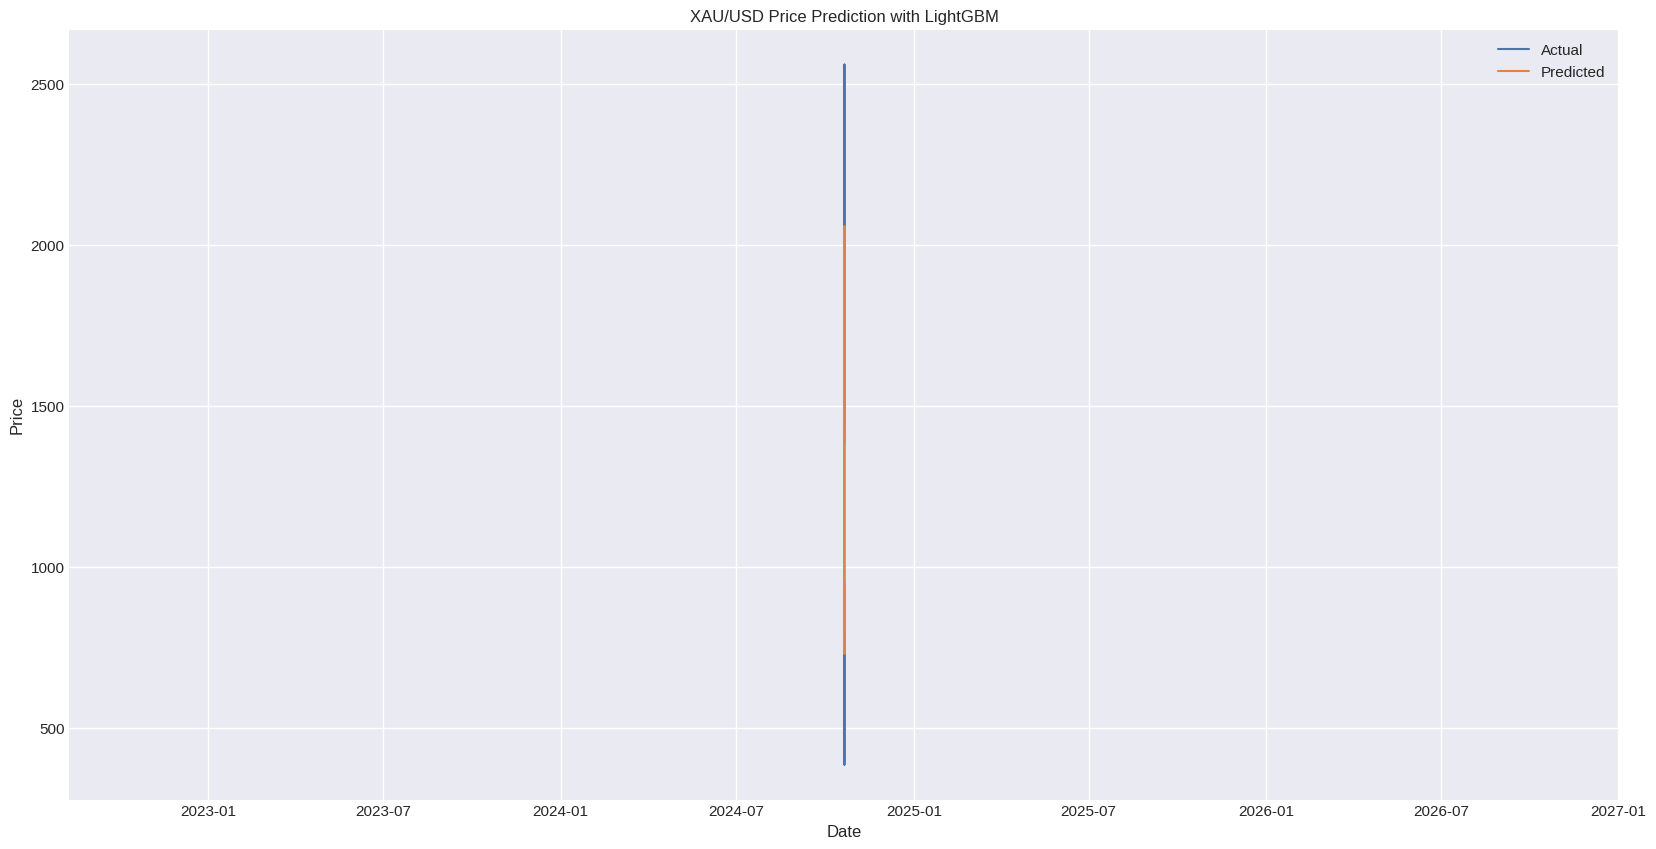

In [105]:
# prompt: use lgb

!pip install lightgbm

import lightgbm as lgb

# Create a LightGBM regressor
model_lgb = lgb.LGBMRegressor(objective='regression', num_leaves=31, learning_rate=0.05, n_estimators=20)

# Fit the model on the training data
model_lgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model_lgb.predict(X_test)

# ### Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)

# Plot the actual prices and predicted prices
plt.figure(figsize=(20, 10))
plt.plot(df['Time'].iloc[-len(y_test):], y_test.values, label='Actual')
plt.plot(df['Time'].iloc[-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('XAU/USD Price Prediction with LightGBM')
plt.legend()
plt.show()

# You can also perform hyperparameter tuning for LightGBM using GridSearchCV similar to other models.
# Example:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'num_leaves': [31, 50, 100],
#     'learning_rate': [0.1, 0.05, 0.01]
# }
# grid_search = GridSearchCV(lgb.LGBMRegressor(objective='regression'), param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)
# best_lgb_model = grid_search.best_estimator_

Lasso Regression - Mean Absolute Error: 1.8612382683181077
Lasso Regression - Mean Squared Error: 9.355157622211669
Lasso Regression - R-squared: 0.999959823529757


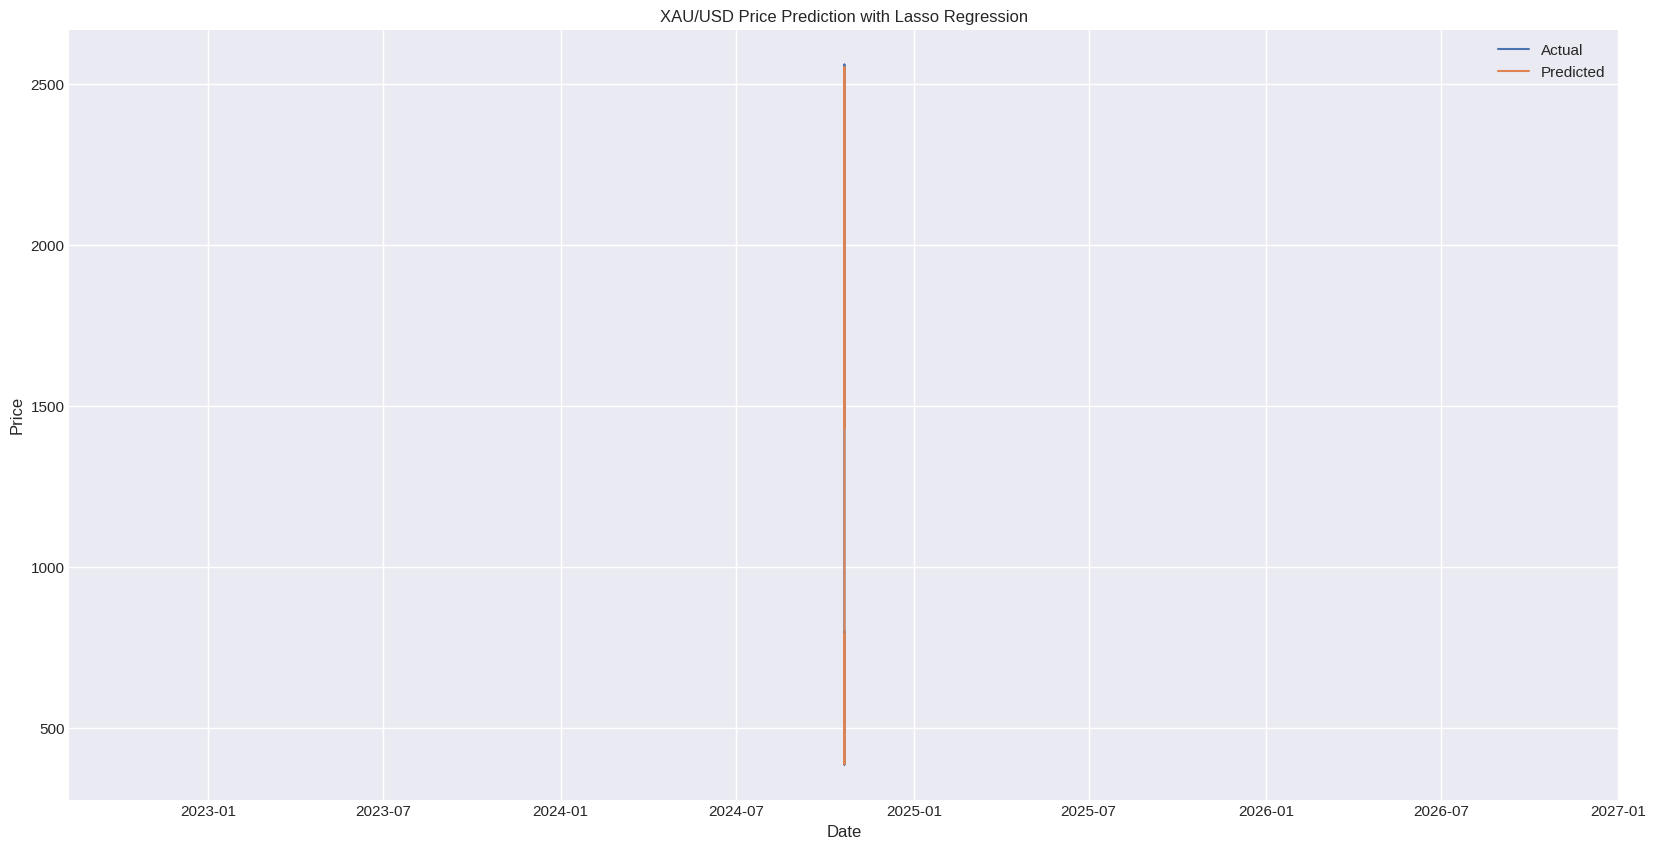

In [116]:
from sklearn.linear_model import Lasso

# Create a Lasso Regression model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value

# Fit the model to the training data
lasso_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso_model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Lasso Regression - Mean Absolute Error:", mae)
print("Lasso Regression - Mean Squared Error:", mse)
print("Lasso Regression - R-squared:", r2)

# Plot the actual and predicted prices
plt.figure(figsize=(20, 10))
plt.plot(df['Time'].iloc[-len(y_test):], y_test.values, label='Actual')
plt.plot(df['Time'].iloc[-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('XAU/USD Price Prediction with Lasso Regression')
plt.legend()
plt.show()


In [118]:
# Assuming 'lasso_model' is your trained Lasso Regression model
filename = '/content/drive/MyDrive/Gold/lasso_trained_model.pkl'
pickle.dump(lasso_model, open(filename, 'wb'))

Mean Absolute Error (MAE): 2.74646426916067
Mean Squared Error (MSE): 15.406207941824
R-squared (R2) Score: 0.999933836811743


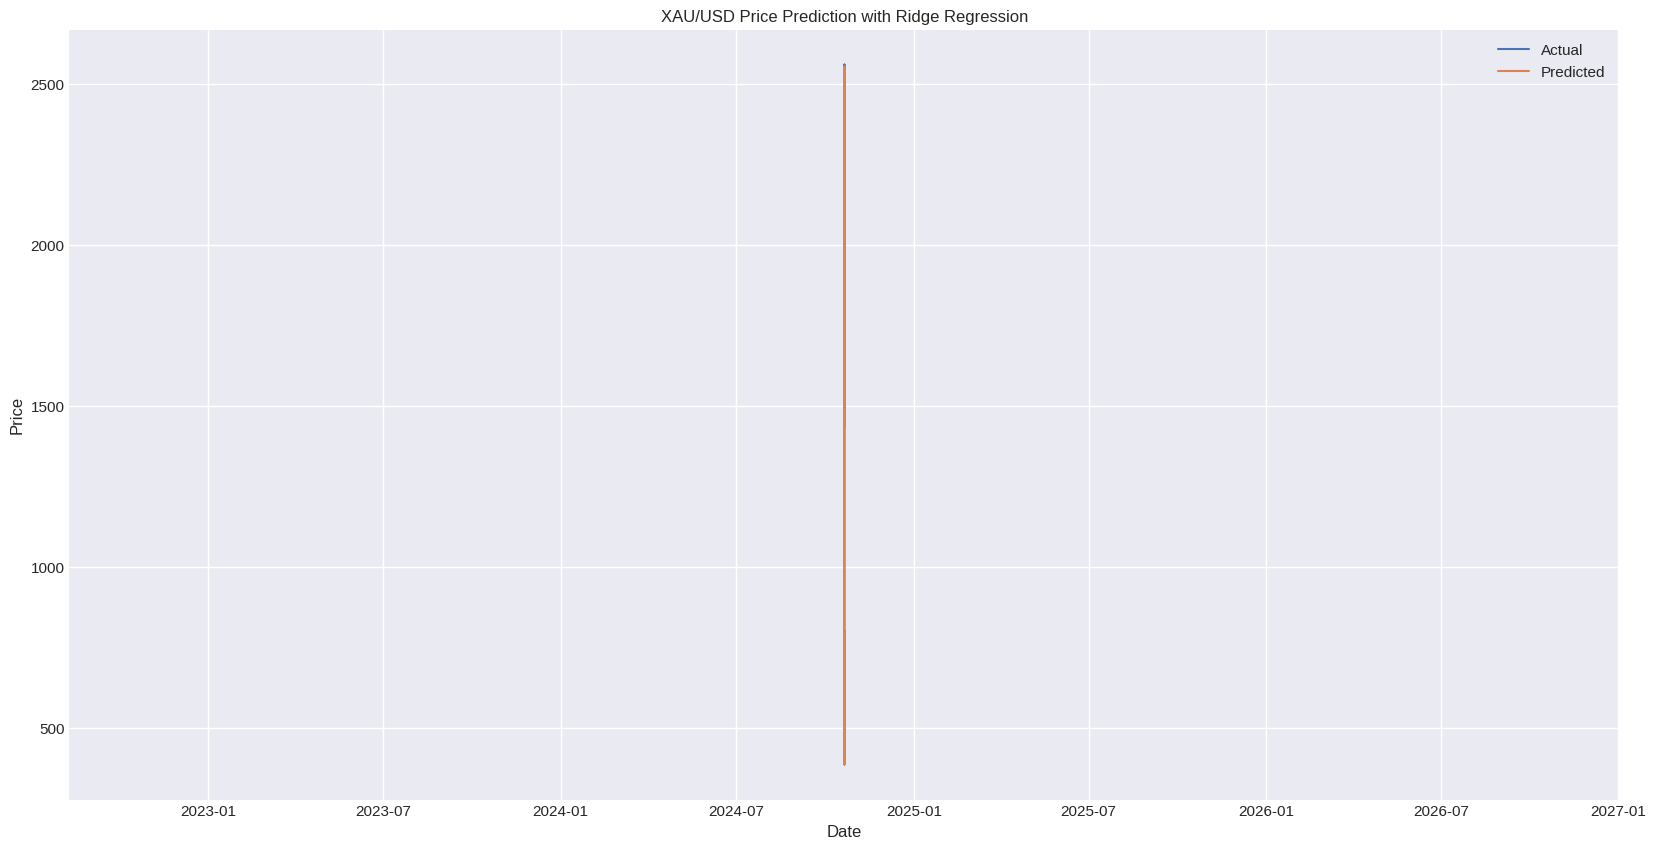

In [107]:
# prompt: use ridge regression

from sklearn.linear_model import Ridge

# Instantiate the Ridge Regression model
modelridge = Ridge(alpha=1.0)  # You can adjust the alpha parameter

# Fit the model on the training data
modelridge.fit(X_train, y_train)

# Make predictions on the test data
y_pred = modelridge.predict(X_test)

# ### Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error (MAE):', mae)
print('Mean Squared Error (MSE):', mse)
print('R-squared (R2) Score:', r2)

# Plot the actual prices and predicted prices
plt.figure(figsize=(20, 10))
plt.plot(df['Time'].iloc[-len(y_test):], y_test.values, label='Actual')
plt.plot(df['Time'].iloc[-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('XAU/USD Price Prediction with Ridge Regression')
plt.legend()
plt.show()

# You can also perform hyperparameter tuning for Ridge Regression using GridSearchCV.
# Example:
# from sklearn.model_selection import GridSearchCV
# param_grid = {
#     'alpha': [0.1, 1.0, 10.0]
# }
# grid_search = GridSearchCV(Ridge(), param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)
# best_ridge_model = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.120e+05, tolerance: 7.257e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.172e+05, tolerance: 7.376e+04
  model = cd_fast.enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.154e+05, tolerance: 7.317e

ElasticNet - Mean Squared Error: 15.958427918536556
ElasticNet - Mean Absolute Error: 2.833359761801922
ElasticNet - R-squared: 0.9999314652590275


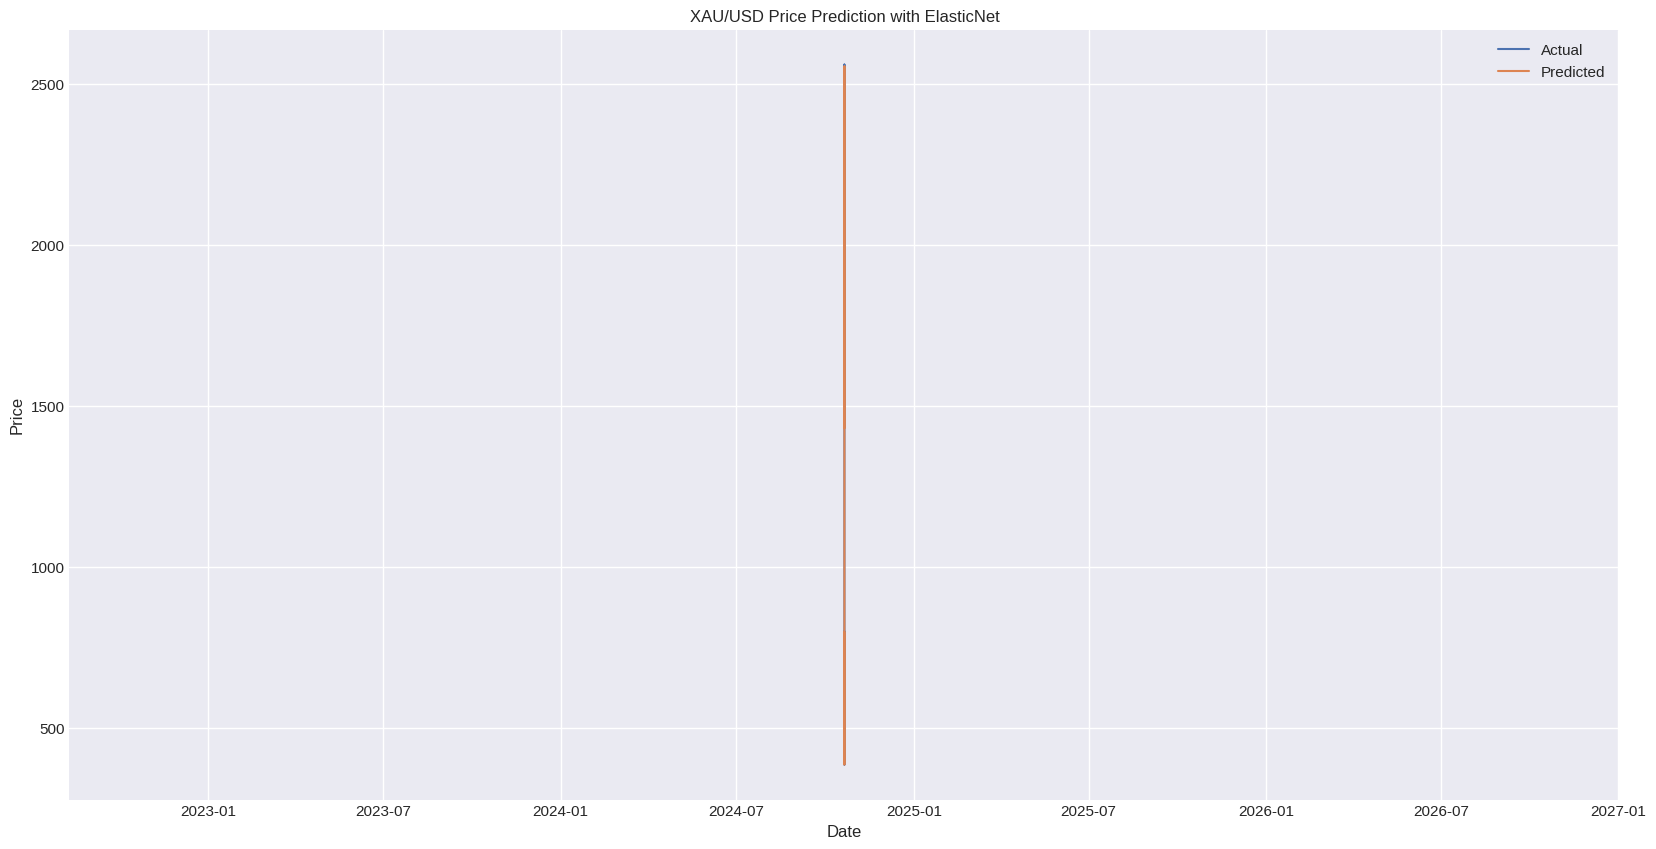

In [108]:
# prompt: use elasticnet

from sklearn.linear_model import ElasticNet

# Create a pipeline with StandardScaler and ElasticNet
pipeline = Pipeline([
    ('scaler', StandardScaler(with_mean=False)),
    ('regressor', ElasticNet())
])

# Define the hyperparameters and their possible values for tuning
hyperparameters = {
    'regressor__alpha': [0.1, 0.5, 1.0],  # Regularization strength
    'regressor__l1_ratio': [0.1, 0.5, 0.9],  # Mix of L1 and L2 regularization
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, hyperparameters, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Fit the best model to the training data
best_model.fit(X_train, y_train)

# Predict on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('ElasticNet - Mean Squared Error:', mse)
print('ElasticNet - Mean Absolute Error:', mae)
print('ElasticNet - R-squared:', r2)

# Plot the actual prices and predicted prices
plt.figure(figsize=(20, 10))
plt.plot(df['Time'].iloc[-len(y_test):], y_test.values, label='Actual')
plt.plot(df['Time'].iloc[-len(y_test):], y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('XAU/USD Price Prediction with ElasticNet')
plt.legend()
plt.show()

In [113]:
import pandas as pd
import numpy as np
from datetime import datetime
import joblib
from sklearn.preprocessing import MinMaxScaler

# Load the pre-trained model and the scaler (replace with your model and scaler paths)
model = lasso_model

# Function to create features from the close prices
def create_features_from_close(df):
    # Lag Features
    for lag in range(1, 6):
        df[f'Close_lag{lag}'] = df['Close'].shift(lag)

    # 5-Day Moving Average (MA_5)
    df['MA_5'] = df['Close'].rolling(window=5).mean()

    # 5-Day Rate of Change (ROC_5)
    df['ROC_5'] = (df['Close'] - df['Close'].shift(5)) / df['Close'].shift(5) * 100

    # Momentum
    df['Momentum_5'] = df['Close'] - df['Close'].shift(5)

    # Exponential Moving Average (EMA_5)
    df['EMA_5'] = df['Close'].ewm(span=5, adjust=False).mean()

    # 5-Day Standard Deviation (Volatility)
    df['std_5'] = df['Close'].rolling(window=5).std()

    # Bollinger Bands (Upper and Lower Bands)
    df['Upper_Band'] = df['MA_5'] + (2 * df['std_5'])
    df['Lower_Band'] = df['MA_5'] - (2 * df['std_5'])

    # Close difference (Close_diff)
    df['Close_diff'] = df['Close'] - df['Close'].shift(1)

    # Cumulative return for the last 5 days
    df['Cumulative_Return_5'] = df['Close'].pct_change(5).cumsum()

    # Volatility (alias for standard deviation)
    df['Volatility_5'] = df['std_5']

    return df

# Function to extract date features
def extract_date_features(date_str):
    # Parse the input date
    date = datetime.strptime(date_str, "%Y-%m-%d")
    return date.year, date.month, date.day, date.weekday()

# Function to take user inputs and make prediction
def take_inputs_and_predict():
    # Default input values for last 5 days' close prices
    close_prices = [ 2651.05, 2660.99, 2673.24, 2692.55,2720.25,2723.51]

    # Check if we have enough close prices to create features
    if len(close_prices) < 5:
        print("Not enough data to create features for prediction.")
        return

    # Creating a DataFrame with the last 5 days' close prices
    df = pd.DataFrame({'Close': close_prices})
    print("Initial DataFrame with Close prices:")
    print(df)

    # Creating features from close prices
    df = create_features_from_close(df)

    print("DataFrame after feature engineering:")
    print(df)

    # Dropping NA values generated from lagging and rolling operations
    df = df.dropna().reset_index(drop=True)

    # Check if DataFrame is empty after dropping NA
    if df.empty:
        print("No valid data available for prediction after feature engineering.")
        return

    # Extracting date-based features
    year, month, day, day_of_week = extract_date_features("2024-10-10")

    # Adding high, low, open, and date features to the DataFrame
    df['Open'] = 2723.14
    df['High'] = 2725.19
    df['Low'] = 2720.61

    # Ensure columns are in the exact order expected by the model
    columns_needed = [
        'Open', 'High', 'Low',
        'Close_lag1', 'Close_lag2', 'Close_lag3', 'Close_lag4', 'Close_lag5',
        'MA_5', 'ROC_5', 'Momentum_5', 'EMA_5', 'std_5', 'Upper_Band', 'Lower_Band',
        'Volatility_5', 'Cumulative_Return_5', 'Close_diff'
    ]

    # Ensure the order of columns matches the order during training
    df = df[columns_needed]

    # Scaling the features using the pre-trained MinMaxScaler
    df_scaled = pd.DataFrame(scaler.transform(df), columns=df.columns)

    # Making prediction using the model
    prediction = model.predict(df_scaled)

    # Printing the prediction
    print(f"The predicted value is: {prediction[0]}")

# Call the function to take inputs and predict
take_inputs_and_predict()


Initial DataFrame with Close prices:
     Close
0  2651.05
1  2660.99
2  2673.24
3  2692.55
4  2720.25
5  2723.51
DataFrame after feature engineering:
     Close  Close_lag1  Close_lag2  Close_lag3  Close_lag4  Close_lag5  \
0  2651.05         NaN         NaN         NaN         NaN         NaN   
1  2660.99     2651.05         NaN         NaN         NaN         NaN   
2  2673.24     2660.99     2651.05         NaN         NaN         NaN   
3  2692.55     2673.24     2660.99     2651.05         NaN         NaN   
4  2720.25     2692.55     2673.24     2660.99     2651.05         NaN   
5  2723.51     2720.25     2692.55     2673.24     2660.99     2651.05   

       MA_5     ROC_5  Momentum_5        EMA_5      std_5   Upper_Band  \
0       NaN       NaN         NaN  2651.050000        NaN          NaN   
1       NaN       NaN         NaN  2654.363333        NaN          NaN   
2       NaN       NaN         NaN  2660.655556        NaN          NaN   
3       NaN       NaN         NaN 

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning: X has feature names, but Lasso was fitted without feature names
  warnings.warn(


In [115]:


import pickle

# Assuming 'best_model' is your trained model
filename = '/content/drive/MyDrive/Gold/lasso_model.pkl'
pickle.dump(best_model, open(filename, 'wb'))